In [1]:
from xmip.preprocessing import combined_preprocessing
from xmip.utils import google_cmip_col
from xmip.postprocessing import match_metrics
import matplotlib.pyplot as plt

In [2]:
col = google_cmip_col()
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [3]:
col.df['source_id'].unique()

array(['CMCC-CM2-HR4', 'EC-Earth3P-HR', 'HadGEM3-GC31-MM',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LM', 'EC-Earth3P', 'ECMWF-IFS-HR',
       'ECMWF-IFS-LR', 'HadGEM3-GC31-LL', 'CMCC-CM2-VHR4', 'GFDL-CM4',
       'GFDL-AM4', 'IPSL-CM6A-LR', 'E3SM-1-0', 'CNRM-CM6-1', 'GFDL-ESM4',
       'GFDL-ESM2M', 'GFDL-CM4C192', 'GFDL-OM4p5B', 'GISS-E2-1-G',
       'GISS-E2-1-H', 'CNRM-ESM2-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'MIROC6',
       'AWI-CM-1-1-MR', 'EC-Earth3-LR', 'IPSL-CM6A-ATM-HR', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'SAM0-UNICON',
       'GISS-E2-1-G-CC', 'UKESM1-0-LL', 'EC-Earth3', 'EC-Earth3-Veg',
       'FGOALS-f3-L', 'CanESM5', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'NESM3', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MRI-AGCM3-2-H', 'MRI-AGCM3-2-S',
       'MCM-UA-1-0', 'INM-CM5-H', 'KACE-1-0-G', 'NorESM2-LM',
       'FGOALS-f3-H', 'FGOALS-g3', 'MIROC-ES2L', 'FIO-ESM-2-0', 'NorCPM1',
       'NorESM1-F', 'MPI-ESM1-2-XR'

In [4]:
col.df['institution_id'].unique()

array(['CMCC', 'EC-Earth-Consortium', 'MOHC', 'ECMWF', 'NOAA-GFDL',
       'IPSL', 'E3SM-Project', 'CNRM-CERFACS', 'NASA-GISS', 'BCC',
       'MIROC', 'AWI', 'NCAR', 'MRI', 'SNU', 'CAS', 'CCCma', 'INM',
       'NUIST', 'HAMMOZ-Consortium', 'CAMS', 'MPI-M', 'DKRZ', 'DWD', 'UA',
       'NIMS-KMA', 'NCC', 'FIO-QLNM', 'KIOST', 'CSIRO-ARCCSS', 'CSIRO',
       'CCCR-IITM', 'THU', 'AS-RCEC', 'NERC', 'RUBISCO'], dtype=object)

In [5]:
col.df['experiment_id'].unique()

array(['highresSST-present', 'piControl', 'control-1950', 'hist-1950',
       'historical', 'amip', 'abrupt-4xCO2', 'abrupt-2xCO2',
       'abrupt-0p5xCO2', '1pctCO2', 'ssp585', 'esm-piControl', 'esm-hist',
       'hist-piAer', 'histSST-1950HC', 'ssp245', 'hist-1950HC', 'histSST',
       'piClim-2xVOC', 'piClim-2xNOx', 'piClim-2xdust', 'piClim-2xss',
       'piClim-histall', 'hist-piNTCF', 'histSST-piNTCF',
       'aqua-control-lwoff', 'piClim-lu', 'histSST-piO3', 'piClim-CH4',
       'piClim-NTCF', 'piClim-NOx', 'piClim-O3', 'piClim-HC',
       'faf-heat-NA0pct', 'ssp370SST-lowCH4', 'piClim-VOC',
       'ssp370-lowNTCF', 'piClim-control', 'piClim-aer', 'hist-aer',
       'faf-heat', 'faf-heat-NA50pct', 'ssp370SST-lowNTCF',
       'ssp370SST-ssp126Lu', 'ssp370SST', 'ssp370pdSST', 'histSST-piAer',
       'piClim-ghg', 'piClim-anthro', 'faf-all', 'hist-nat', 'hist-GHG',
       'ssp119', 'piClim-histnat', 'piClim-4xCO2', 'ssp370',
       'piClim-histghg', 'highresSST-future', 'esm-ssp585-

In [6]:
col.df['table_id'].unique()

array(['Amon', '6hrPlev', '3hr', 'day', 'EmonZ', 'E3hr', '6hrPlevPt',
       'AERmon', 'LImon', 'CFmon', 'Lmon', 'fx', 'SImon', 'Ofx', 'Omon',
       'EdayZ', 'Emon', 'CFday', 'AERday', 'Eday', 'Oyr', 'Eyr', 'Oday',
       'SIday', 'AERmonZ', '6hrLev', 'E1hrClimMon', 'CF3hr', 'AERhr',
       'Odec', 'Oclim', 'Efx', 'Aclim', 'SIclim', 'IfxGre', 'ImonGre',
       'Eclim'], dtype=object)

In [7]:
cat = col.search(
    variable_id='tas',
    table_id = 'Amon',
    experiment_id = 'historical',
    source_id = 'GFDL-ESM4' )
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,3
table_id,1
variable_id,1
grid_label,1
zstore,3
dcpp_init_year,0


In [8]:
cat.df['member_id'].unique()

array(['r3i1p1f1', 'r2i1p1f1', 'r1i1p1f1'], dtype=object)

In [10]:
cat = col.search(
    variable_id = 'tas',
    experiment_id = 'historical',
    table_id = 'Amon',
    grid_label = 'gn', 
    source_id = ['CESM2', 'CanESM5', 'NorESM2-LM'],
    member_id = ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1']
)

ddict = cat.to_dataset_dict(
    preprocess=combined_preprocessing,
    xarray_open_kwargs={'use_cftime':True})



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


In [11]:
list(ddict.keys())

['CMIP.NCAR.CESM2.historical.Amon.gn',
 'CMIP.NCC.NorESM2-LM.historical.Amon.gn',
 'CMIP.CCCma.CanESM5.historical.Amon.gn']

In [12]:
ddict['CMIP.NCAR.CESM2.historical.Amon.gn']

<xarray.Dataset>
Dimensions:         (member_id: 3, dcpp_init_year: 1, time: 1980, y: 192,
                     x: 288, nbnd: 2)
Coordinates:
  * y               (y) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * x               (x) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time            (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bounds     (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon_bounds      (x, nbnd, y) float64 dask.array<chunksize=(288, 2, 192), meta=np.ndarray>
    lat_bounds      (y, nbnd, x) float64 dask.array<chunksize=(192, 2, 288), meta=np.ndarray>
  * nbnd            (nbnd) int64 0 1
    lon             (x, y) float64 360.0 360.0 360.0 360.0 ... 358.8 358.8 358.8
    lat             (x, y) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * member_id       (member_id) object 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Data variables:
    tas             (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/50)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    contact:                          cesm_cmip6@ucar.edu
    data_specs_version:               01.00.29
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.Amon.gn

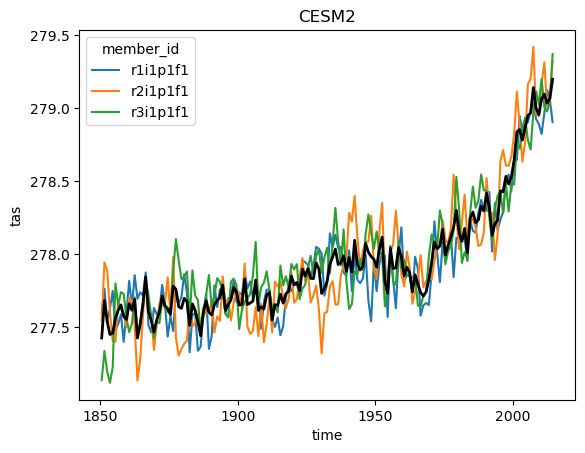

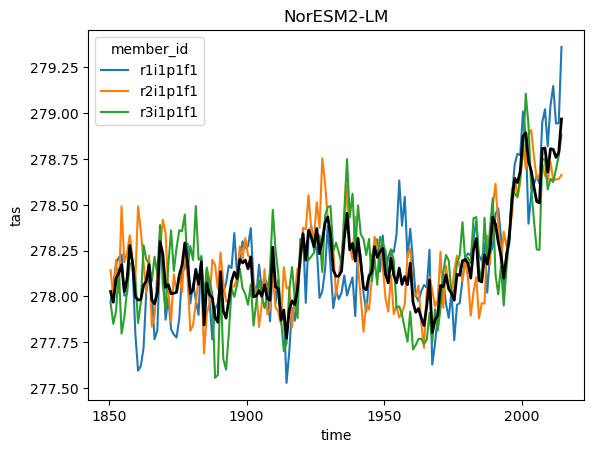

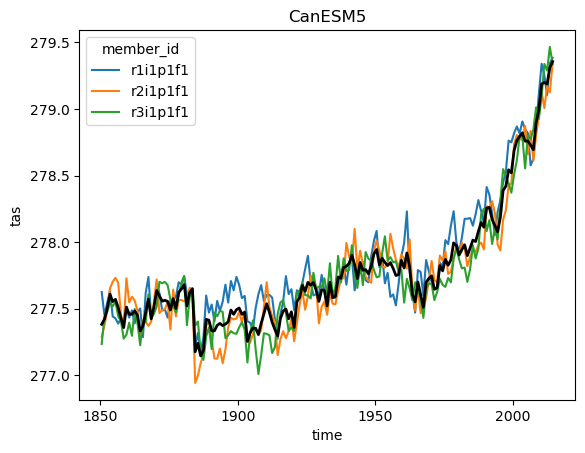

In [13]:
for name, ds in ddict.items():
    mean_temp = ds.tas.mean(['x','y']).coarsen(time=12).mean()
    plt.figure()
    mean_temp.plot(hue='member_id')
    mean_temp.mean('member_id').plot(color='k',linewidth=2)
    plt.title(ds.attrs['source_id'])
    plt.show()
    

In [15]:
catt = col.search(
    variable_id='areacella', 
    table_id = 'fx',
    experiment_id='historical',
    grid_label='gn',
    source_id = ['CESM2', 'CanESM5', 'NorESM2-LM'],
    member_id = ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'])

ddict_area = catt.to_dataset_dict(
        preprocess=combined_preprocessing,
        xarray_open_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [16]:
list(ddict_area.keys())


['CMIP.NCAR.CESM2.historical.fx.gn',
 'CMIP.CCCma.CanESM5.historical.fx.gn',
 'CMIP.NCC.NorESM2-LM.historical.fx.gn']

In [17]:
ddict_area['CMIP.NCAR.CESM2.historical.fx.gn']

<xarray.Dataset>
Dimensions:         (member_id: 3, dcpp_init_year: 1, y: 192, x: 288, nbnd: 2)
Coordinates:
  * y               (y) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * x               (x) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bounds      (x, nbnd, y) float64 dask.array<chunksize=(288, 2, 192), meta=np.ndarray>
    lat_bounds      (y, nbnd, x) float64 dask.array<chunksize=(192, 2, 288), meta=np.ndarray>
  * nbnd            (nbnd) int64 0 1
    lon             (x, y) float64 360.0 360.0 360.0 360.0 ... 358.8 358.8 358.8
    lat             (x, y) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * member_id       (member_id) object 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Data variables:
    areacella       (member_id, dcpp_init_year, y, x) float32 dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    contact:                          cesm_cmip6@ucar.edu
    data_specs_version:               01.00.29
    ...                               ...
    intake_esm_attrs:table_id:        fx
    intake_esm_attrs:variable_id:     areacella
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.fx.gn

In [18]:
ddict_w_area = match_metrics(ddict, ddict_area, 'areacella')

/home/danielmw/.local/lib/python3.11/site-packages/xmip/postprocessing.py:89: UserWarning: Match attributes ['variant_label'] not found in any of the datasets.         This can happen when several combination functions are used and attributes are removed during merging.         Double check the results.
  warnings.warn(


In [19]:
ddict_w_area['CMIP.NCAR.CESM2.historical.Amon.gn']

<xarray.Dataset>
Dimensions:         (member_id: 3, dcpp_init_year: 1, time: 1980, y: 192,
                     x: 288, nbnd: 2)
Coordinates:
  * y               (y) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * x               (x) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time            (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bounds     (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon_bounds      (x, nbnd, y) float64 dask.array<chunksize=(288, 2, 192), meta=np.ndarray>
    lat_bounds      (y, nbnd, x) float64 dask.array<chunksize=(192, 2, 288), meta=np.ndarray>
  * nbnd            (nbnd) int64 0 1
    lon             (x, y) float64 360.0 360.0 360.0 360.0 ... 358.8 358.8 358.8
    lat             (x, y) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * member_id       (member_id) object 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
    areacella       (member_id, dcpp_init_year, y, x) float32 dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
Data variables:
    tas             (member_id, dcpp_init_year, time, y, x) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/50)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    contact:                          cesm_cmip6@ucar.edu
    data_specs_version:               01.00.29
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.Amon.gn

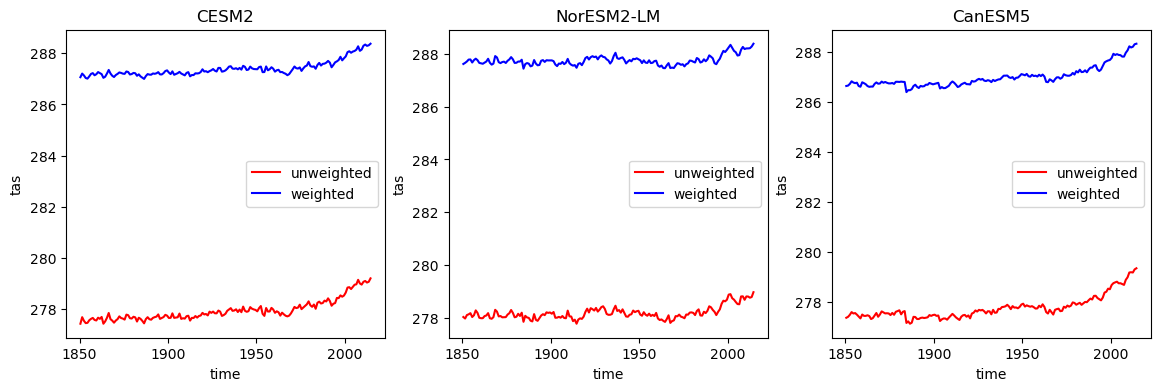

In [20]:
plt.figure(figsize=[14,4])
for i, (name,ds) in enumerate(ddict_w_area.items()): 
    plt.subplot(1,3,i+1)
    mean_temp = ds.tas.mean(['x','y']).coarsen(time=12).mean()
    weights = ds.areacella
    mean_temp_weighted = ds.tas.weighted(weights).mean(['x','y']).coarsen(time=12).mean()
    mean_temp.mean('member_id').plot(label = 'unweighted', color='r')
    mean_temp_weighted.mean('member_id').plot(label='weighted',color='b')
    plt.title(ds.attrs['source_id'])
    plt.legend()
    

Text(0.5, 1.0, 'Global average  surface temperature')

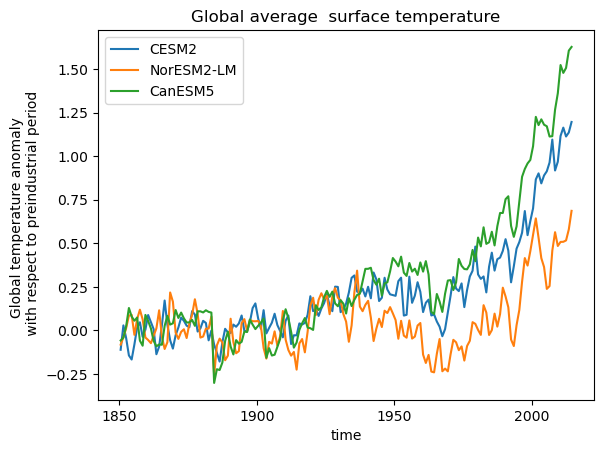

In [21]:
plt.figure()
timeseries_dict = {}
for name, ds in ddict_w_area.items():
    # construct yearly global mean timeseries
    weights = ds.areacella
    mean_temp_weighted = ds['tas'].weighted(weights).mean(['x', 'y']).coarsen(time=12).mean()
    anomaly = mean_temp_weighted - mean_temp_weighted.sel(time=slice('1850', '1900')).mean('time')
    anomaly.mean('member_id').plot(label = ds.attrs['source_id'])
plt.legend()
plt.ylabel('Global temperature anomaly \n with respect to preindustrial period')
plt.title('Global average surface temperature')